In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import prepare as p
import summarize as s

In [2]:
df = a.get_heart()
df = p.rename_cols(df)
df = p.replace_cat_values(df)

In [3]:
df_original = pd.read_csv('heart.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      301 non-null    int64  
 1   sex                      301 non-null    object 
 2   chest_pain_type          301 non-null    object 
 3   resting_bp               301 non-null    int64  
 4   cholesterol              301 non-null    int64  
 5   fasting_blood_sugar>120  301 non-null    int64  
 6   rest_ecg                 301 non-null    object 
 7   max_heart_rate           301 non-null    int64  
 8   exercise_induced_angina  301 non-null    bool   
 9   oldpeak                  301 non-null    float64
 10  st_slope                 301 non-null    object 
 11  num_major_blood_vessels  301 non-null    int64  
 12  defect_type              301 non-null    object 
 13  high_risk_of_mi          301 non-null    bool   
dtypes: bool(2), float64(1), in

((301, 14),
 None,
               age  resting_bp  cholesterol  fasting_blood_sugar>120  \
 count  301.000000  301.000000   301.000000               301.000000   
 mean    54.378738  131.647841   246.504983                 0.146179   
 std      9.110950   17.594002    51.915998                 0.353874   
 min     29.000000   94.000000   126.000000                 0.000000   
 25%     47.000000  120.000000   211.000000                 0.000000   
 50%     56.000000  130.000000   241.000000                 0.000000   
 75%     61.000000  140.000000   275.000000                 0.000000   
 max     77.000000  200.000000   564.000000                 1.000000   
 
        max_heart_rate     oldpeak  num_major_blood_vessels  
 count      301.000000  301.000000               301.000000  
 mean       149.740864    1.043189                 0.734219  
 std         22.891031    1.163384                 1.024268  
 min         71.000000    0.000000                 0.000000  
 25%        134.00000

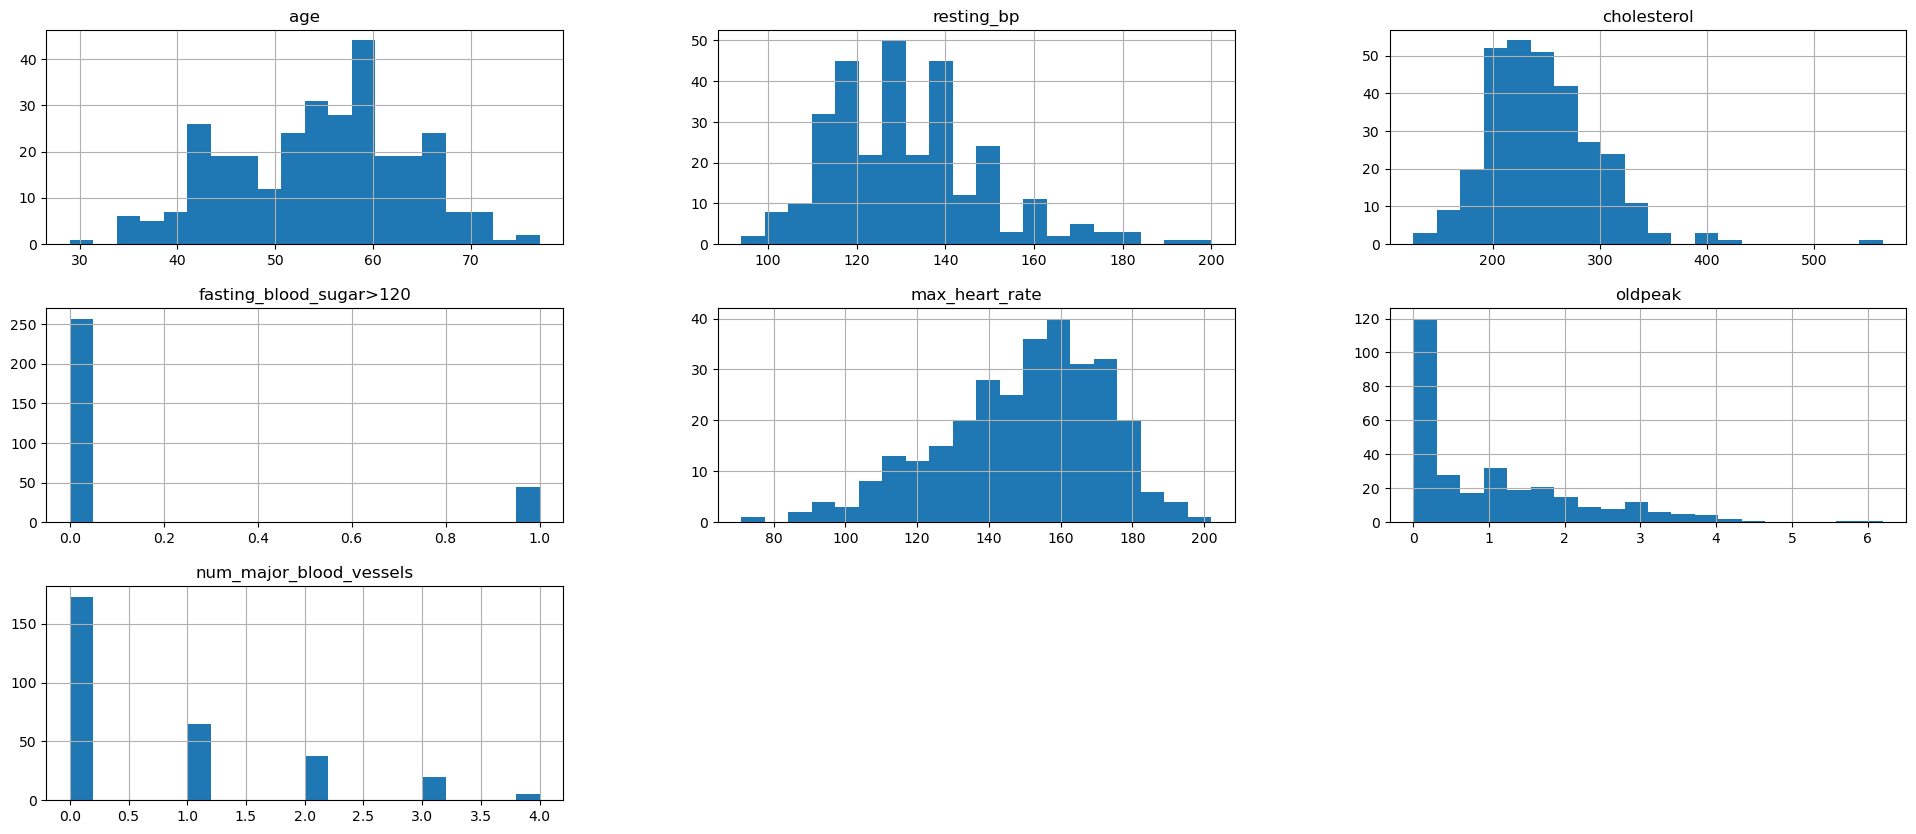

In [4]:
s.summarize(df)

In [5]:
df.shape

(301, 14)

In [6]:
train, val, test =  p.split_data(df, 'defect_type')

In [7]:
train.shape, val.shape, test.shape

((201, 14), (51, 14), (49, 14))

- - -
Beginning more in-depth visual exploration
- - -

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 294 to 181
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      201 non-null    int64  
 1   sex                      201 non-null    object 
 2   chest_pain_type          201 non-null    object 
 3   resting_bp               201 non-null    int64  
 4   cholesterol              201 non-null    int64  
 5   fasting_blood_sugar>120  201 non-null    int64  
 6   rest_ecg                 201 non-null    object 
 7   max_heart_rate           201 non-null    int64  
 8   exercise_induced_angina  201 non-null    bool   
 9   oldpeak                  201 non-null    float64
 10  st_slope                 201 non-null    object 
 11  num_major_blood_vessels  201 non-null    int64  
 12  defect_type              201 non-null    object 
 13  high_risk_of_mi          201 non-null    bool   
dtypes: bool(2), float64(1), 

Inital Questions:

- Does higher resting blood pressure lead to higher risk of heart attack?
- Does type of chest pain relate to st_slope?
- How strongly is cholesterol correlated with high risk?
- Is oldpeak related to high risk?  What is oldpeak?
- st_slope to high risk